In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

sys.path.append('../../../common_code')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


## Appendix figure showing the formation channel yields per flavor

This file uses CSV files that are produced using the code `/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/produceDataCode/write_formation_channel_rates_to_CSV_per_Z.py` <br>
This code provides simple function that opens the data file for given DCO type and BPS model, and then calculates for each metallicity the total yield for each formation channel, as well as <br>
the total yield. This uses the weights from the hdf5 file (stroopwafel weights), as well as the calculated formation channels from the DoubleCompactObjects file.  It returns the csv files <br>
with the saved calculated yields per formation channel and metallicity in the location: `/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/formation_channels_per_Z_hdf5weights_DCOname.csv` <br>
with DCOname one of: BHBH, BHNS or NSNS 




In [229]:

def plotFormationChannelsPerMetallicitySingle(axe=[], metallicities=[0.001, 0.33], formationRates=[0,0], formationRates_MT=[0,0], colorlist=['k'], totalcolor='k', BPSmodelname='A',Ylim=3.85, DCOtype='BBH', plot_stacked=True, plot_fraction=False):
    """
    
    plots a single panel with formation channel yields per metallicity
    
    """
    
    # start building from 0
#     upperY = np.zeros_like(formationRates[0])
#     lowerY = np.zeros_like(formationRates[0])
    
    # go over rates of channels
#     total = 0 
#     for ind_c, c_rate in enumerate(formationRates):
#         total += c_rate 
    
#     total_sum = np.sum(total)
#     total=total.values
    
    
    plotfactor_higher=1 #False
#     if plot_fraction==False:
#         if (DCOtype=='BNS') & (BPSmodelname in [ "E", "H"]):
#             plotfactor_higher=10
#         # multiply the rate by a factor 10 (or chosen factor) to make the yields visible in the large figure
#         elif (DCOtype=='BHNS') & (BPSmodelname in [ "E", "G"]):
#             plotfactor_higher=10        
    
    
#     for ind_c, c_rate in enumerate(formationRates[:]):
        
        
# #         if plot_fraction==True:
# #             fc_plot_rate = c_rate/total # take the fraction
# # #                 print('between 0 1 ', c_rate)
# #         else:
#     fc_plot_rate = c_rate #*1e5
        
#         # add this rate, 
#         if plotfactor_higher==False:
#             upperY += fc_plot_rate
#         else:
#             upperY+= fc_plot_rate*plotfactor_higher
            
        
        
    formationRates=[]
    pathToData='/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/'
    channel_names = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other'] #['I_classic', 'II_only_stable_MT', 'III_single_core_CE', 'IV_double_core_CE', 'V_other']

#     print()
    if plot_fraction==False:
        DCOnamelist_ = [ 'NSNS','BHBH', 'BHNS']

        total_c = [ 'cyan', 'k', 'purple' ]

        for ind_DCO, DCOtemp in enumerate(DCOnamelist_):
            formationRates=[]
            stringgg =  'formation_channels_per_Z_hdf5weights'
            writePath = pathToData  + stringgg + '_'  + DCOtemp + '.csv'
            df = pd.read_csv(writePath, index_col=0)

            for nrC, c_ in enumerate(channel_names):             # get rate of this channel: 
                key_ = BPSmodelname + ' ' + headerDict_Z_rev[c_]+ '  [Msun^{-1}]' #bps_model + ' ' + c_ + '  [Msun^{-1}]'
                formationRates.append(df[key_])
                
            # go over rates of channels
            total = 0 
            for ind_c, c_rate in enumerate(formationRates):
                total += c_rate 

            total_sum = np.sum(total)
            total=total.values

#             print(DCOtemp, total)
            axe.plot(metallicities, total, color=total_c[ind_DCO], lw=4, alpha=1, label='%s rate'%DCOtemp) #, label=percentage_str)              
       
    headerDict_Z  = { 0:'stableRLOF', 1:'CE', 2:'failedCE'} 
    colors_dict = {0:'orange', 1:'blue', 2:'green'}
    names_dict = {0:'stable RLOF', 1:'CE', 2:'merger'}
    

    

    for nrMT in range(3):             # get rate of this channel: 
        MT_rate = formationRates_MT[nrMT].values

        if plot_fraction==False:
            axe.plot(metallicities, MT_rate, color=colors_dict[nrMT], lw=4, alpha=1, label='%s rate'%names_dict[nrMT]) #, label=percentage_str)              
        else:     
            merger_rates = formationRates_MT[2].values
            axe.plot(metallicities, MT_rate/merger_rates, color=colors_dict[nrMT], lw=4, alpha=1, label='%s rate'%names_dict[nrMT]) #, label=percentage_str) 

#     ### second axes ###
#     if plot_fraction==True:
#         ax2y = axe.twinx()
#         ylabel2 =  r'$\eta \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'   
#         ax2y.set_ylim(bottom=0)
#         cdfcolor='k'
#         ax2y.plot(metallicities, total*1E5, color=cdfcolor, lw=3, alpha=1, linestyle=':')

#         ax2y.tick_params(labelsize=fs-4, colors=cdfcolor)
#         ax2y.set_ylabel(ylabel2, fontsize=fs, color=cdfcolor) 
        
# #         print('total =', total)
    
    
    ######## AXES LABELS, LEGENDS, LIMS,  ###########
    # plot extra vertical line to indicate metallicities   
#     for zz_ind, zz in enumerate(metallicity_vlines_values_list) :
#         axe.plot([zz,zz], [0,Ylim+1], \
#                          c='k',\
#                          lw=1.2, alpha=1, linestyle=':', zorder=100)   
#         axe.text(zz-0.06, Ylim-0.022, s=metallicity_vlines_text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='top')   

    
    # location of the small legends is on the left, unless it does not fit:
    if DCOtype=='BBH':
        x_box, y_box = 0.63, .4
    elif (DCOtype=='BNS') and (BPSmodelname=='G'):
        x_box, y_box = 0.63, .4
    else:
        x_box, y_box = 0.01, .47
    
#     if plot_fraction==False:
    axe.legend(fontsize=12,  ncol=2,  loc="upper right", borderaxespad=0., frameon=False).set_zorder(10000)
    
    axe.set_yscale('log')
    axe.set_xlim(min(metallicities), max(metallicities))
    axe.set_ylim(Ylim[0], Ylim[1])
    
        
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
    axe.annotate(r'\textbf{model %s:}'%(BPSmodelname) + alphabetPhysicalNameDict[BPSmodelname], xy=(0.022, .95),\
                 xycoords='axes fraction', fontsize = fs-8, weight = 'bold', ha='left', va="top", zorder=1E10) #,bbox=bbox_props,\
#                 )

#     if plotfactor_higher!=False:
#         axe.annotate(r'\textbf{%s}'%(plotfactor_higher) +r'$\times$',  xy=(0.88, .15),\
#                      xycoords='axes fraction', fontsize = fs+5, weight = 'bold', ha='left', va="top", zorder=1E10)        

    
    return axe
    
    

In [226]:
# print(np.asarray(metallicities_list))
# metallicity_list = np.concatenate((np.åasarray(metallicities_list),np.asarray([0.03])))
# alphas_list = np.linspace(0.3,1, 6)

# for n_rough_Z_bins in range(6):
#     lowerZ, upperZ = 0 + 9*n_rough_Z_bins, 8 + 9*n_rough_Z_bins

#     print(metallicity_list[lowerZ], metallicity_list[upperZ])

In [227]:

def plotGridFormationRatePerMetallicity(DCOtype = 'BBH', Ylim = 10, csvPath='None', plot_stacked=True, pathToData='/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/', plot_fraction=False):

    channel_names = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other'] #['I_classic', 'II_only_stable_MT', 'III_single_core_CE', 'IV_double_core_CE', 'V_other']
    colorlist = [channelColorDict[i] for i in channel_names]
    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}
    print('doing DCO type  ', DCOtype)
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]  
    DCOname = dictDCOtypeDCOlabel[DCOtype]
    log10metallicities= np.log10(np.asarray(metallicities_list))


    ncols, nrows = 3, 7
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,26), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)}) 

    stringgg =  'formation_channels_per_Z_hdf5weights'
    writePath = pathToData  + stringgg + '_'  + DCOname + '.csv'
    df = pd.read_csv(writePath, index_col=0)
    
    stringgg_MT =  'tempMT_'
    writePath_MT = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/'  + stringgg_MT + '_'  + DCOname + '.csv' 
    df_MT = pd.read_csv(writePath_MT, index_col=0)
    
    for ind_m, bps_model in enumerate(BPSnameslist[:]):

        # hack to obtain the axis row and column index 
        ii, jj  = int(ind_m/ncols)%nrows, ind_m%ncols
         
        formationRates = []
        formationRates_MT = []
        # obtain dataframe with formation channels yields
        df = pd.read_csv(writePath, index_col=0)
        
        

#         for nrC, c_ in enumerate(channel_names):             # get rate of this channel: 
#             key_ = bps_model + ' ' + headerDict_Z_rev[c_]+ '  [Msun^{-1}]' #bps_model + ' ' + c_ + '  [Msun^{-1}]'
#             formationRates.append(df[key_])

            
        headerDict_MT  = { 0:'stableRLOF', 1:'CE', 2:'failedCE'}  
        for nrMT in range(3):             # get rate of this channel: 
              
            key_ = bps_model + ' ' + headerDict_MT[nrMT]+ '  [Msun^{-1}]' #bps_model + ' ' + c_ + '  [Msun^{-1}]'
            formationRates_MT.append(df_MT[key_])
            
        
        # plot for this sub panel & sub model the formation rate per metallicity 
        axe[ii,jj] = plotFormationChannelsPerMetallicitySingle(axe=axe[ii,jj], metallicities=log10metallicities, formationRates=formationRates, formationRates_MT=formationRates_MT, \
                                                               colorlist=colorlist, BPSmodelname=bps_model, Ylim=Ylim, DCOtype=DCOtype, plot_stacked=plot_stacked, plot_fraction=plot_fraction)
#         total_c = ['k', 'cyan',  ]
#         for DCOtemp in ['BHBH', 'BHNS']:
#             stringgg =  'formation_channels_per_Z_hdf5weights'
#             writePath = pathToData  + stringgg + '_'  + DCOtemp + '.csv'
#             df = pd.read_csv(writePath, index_col=0)

#             for nrC, c_ in enumerate(channel_names):             # get rate of this channel: 
#                 key_ = bps_model + ' ' + headerDict_Z_rev[c_]+ '  [Msun^{-1}]' #bps_model + ' ' + c_ + '  [Msun^{-1}]'
#                 formationRates.append(df[key_])
#                 # plot for this sub panel & sub model the formation rate per metallicity 
#             axe[ii,jj] = plotFormationChannelsPerMetallicitySingle(axe=axe[ii,jj], metallicities=log10metallicities, formationRates=formationRates, formationRates_MT=formationRates_MT, \
#                                                                        colorlist=colorlist, BPSmodelname=bps_model, Ylim=Ylim, DCOtype=DCOtype, plot_stacked=plot_stacked, plot_fraction=plot_fraction, total_color=tcolor)

    
    ######### SET LABELS AND AXIS TICKS #########
    fs_label = 20  # fontsize for x and y labels 
    ylabel = r'$\eta \ \  [\ \rm{M}_{\odot}^{-1}]\  $'   
    xlabel = r'$\log_{10}(Z_{\rm{i}})$'
    if plot_fraction == True: ylabel = r'$\textbf{rate / mergers rate}  $'   # overwrite ylabel
        
    
    #### set labels for all needed panels in column 1 ####
    for ii in range(nrows-1):   # set only ylabels for left most panels (first column)
        axe[ii,0] = layoutAxesNoXlabel(axe[ii,0], nameX=None, nameY=ylabel, fontsize=fs_label)
    # bottom left panel needs both axes labels
    axe[nrows-1,0] = layoutAxes(axe[nrows-1,0], nameX=xlabel, nameY=ylabel, fontsize=fs_label)

    ## set labels for all needed panels in column 2  ####
    for ii in range(nrows-1):   # set only ylabels for left most panels (first column)
        axe[ii,1] = layoutAxesNoXandYlabel(axe[ii,1], nameX=None, nameY=None, fontsize=fs_label)
    axe[nrows-1,1] = layoutAxesNoYlabel(axe[nrows-1,1], nameX=xlabel, nameY='xx', fontsize=fs_label)
        
    ## set labels for all needed panels in column 3  ####
    for ii in range(nrows-2):   # set only ylabels for left most panels (first column)
        axe[ii,2] = layoutAxesNoXandYlabel(axe[ii,2], nameX=None, nameY=None, fontsize=fs_label)

    axe[nrows-2,2] = layoutAxesNoYlabel(axe[nrows-2,2], nameX=xlabel, nameY=None, fontsize=fs_label) 
    axe[nrows-1,2].axis('off') # do not show the axes for the last empty panel 
    axe[nrows-2,2].set_zorder(100) # this makes the panel of model R go up in zorder, needed to show "-4" axes tick above other panels
    
    # do not show the axes tick labels for subplots that are not at the edge
    for ii in range(nrows-2):
        axe[ii,2].tick_params(labelbottom=False, labelleft=False)
    for ii in range(nrows-1):
        axe[ii,1].tick_params(labelbottom=False, labelleft=False)
    for ii in range(nrows-1):
        axe[ii,0].tick_params(labelbottom=False)  
    # extra to remove left tick labels only for the bottom plots 
    axe[nrows-1,1].tick_params(labelleft=False) 
    axe[nrows-2,2].tick_params(labelleft=False) 
    ################################################
    
    
    plt.tight_layout() 
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    if plot_stacked==True:
        stack_str = 'stacked'
    else:
        stack_str = 'notstacked'
    if plot_fraction==True: fract_str = '_yield'
    else: fract_str = '_fraction'
        
    plt.savefig('./FormationRatePerZ_'+ DCOname +'_' + stack_str + fract_str + 'withMT.png', dpi=600, transparent=True)
    plt.savefig('./FormationRatePerZ_'+ DCOname +'_' + stack_str + fract_str + 'withMT.pdf')
    plt.show()
    plt.close()
    

doing DCO type   BNS


/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_78759/2678088710.py:104: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_78759/2678088710.py:113: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig('./FormationRatePerZ_'+ DCOname +'_' + stack_str + fract_str + 'withMT.png', dpi=600, transparent=True)
/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_78759/2678088710.py:114: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig('./FormationRatePerZ_'+ DCOname +'_' + stack_str + fract_str + 'withMT.pdf')
/Users/floorbroekgaarden/miniforge3/envs/ipykernel_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


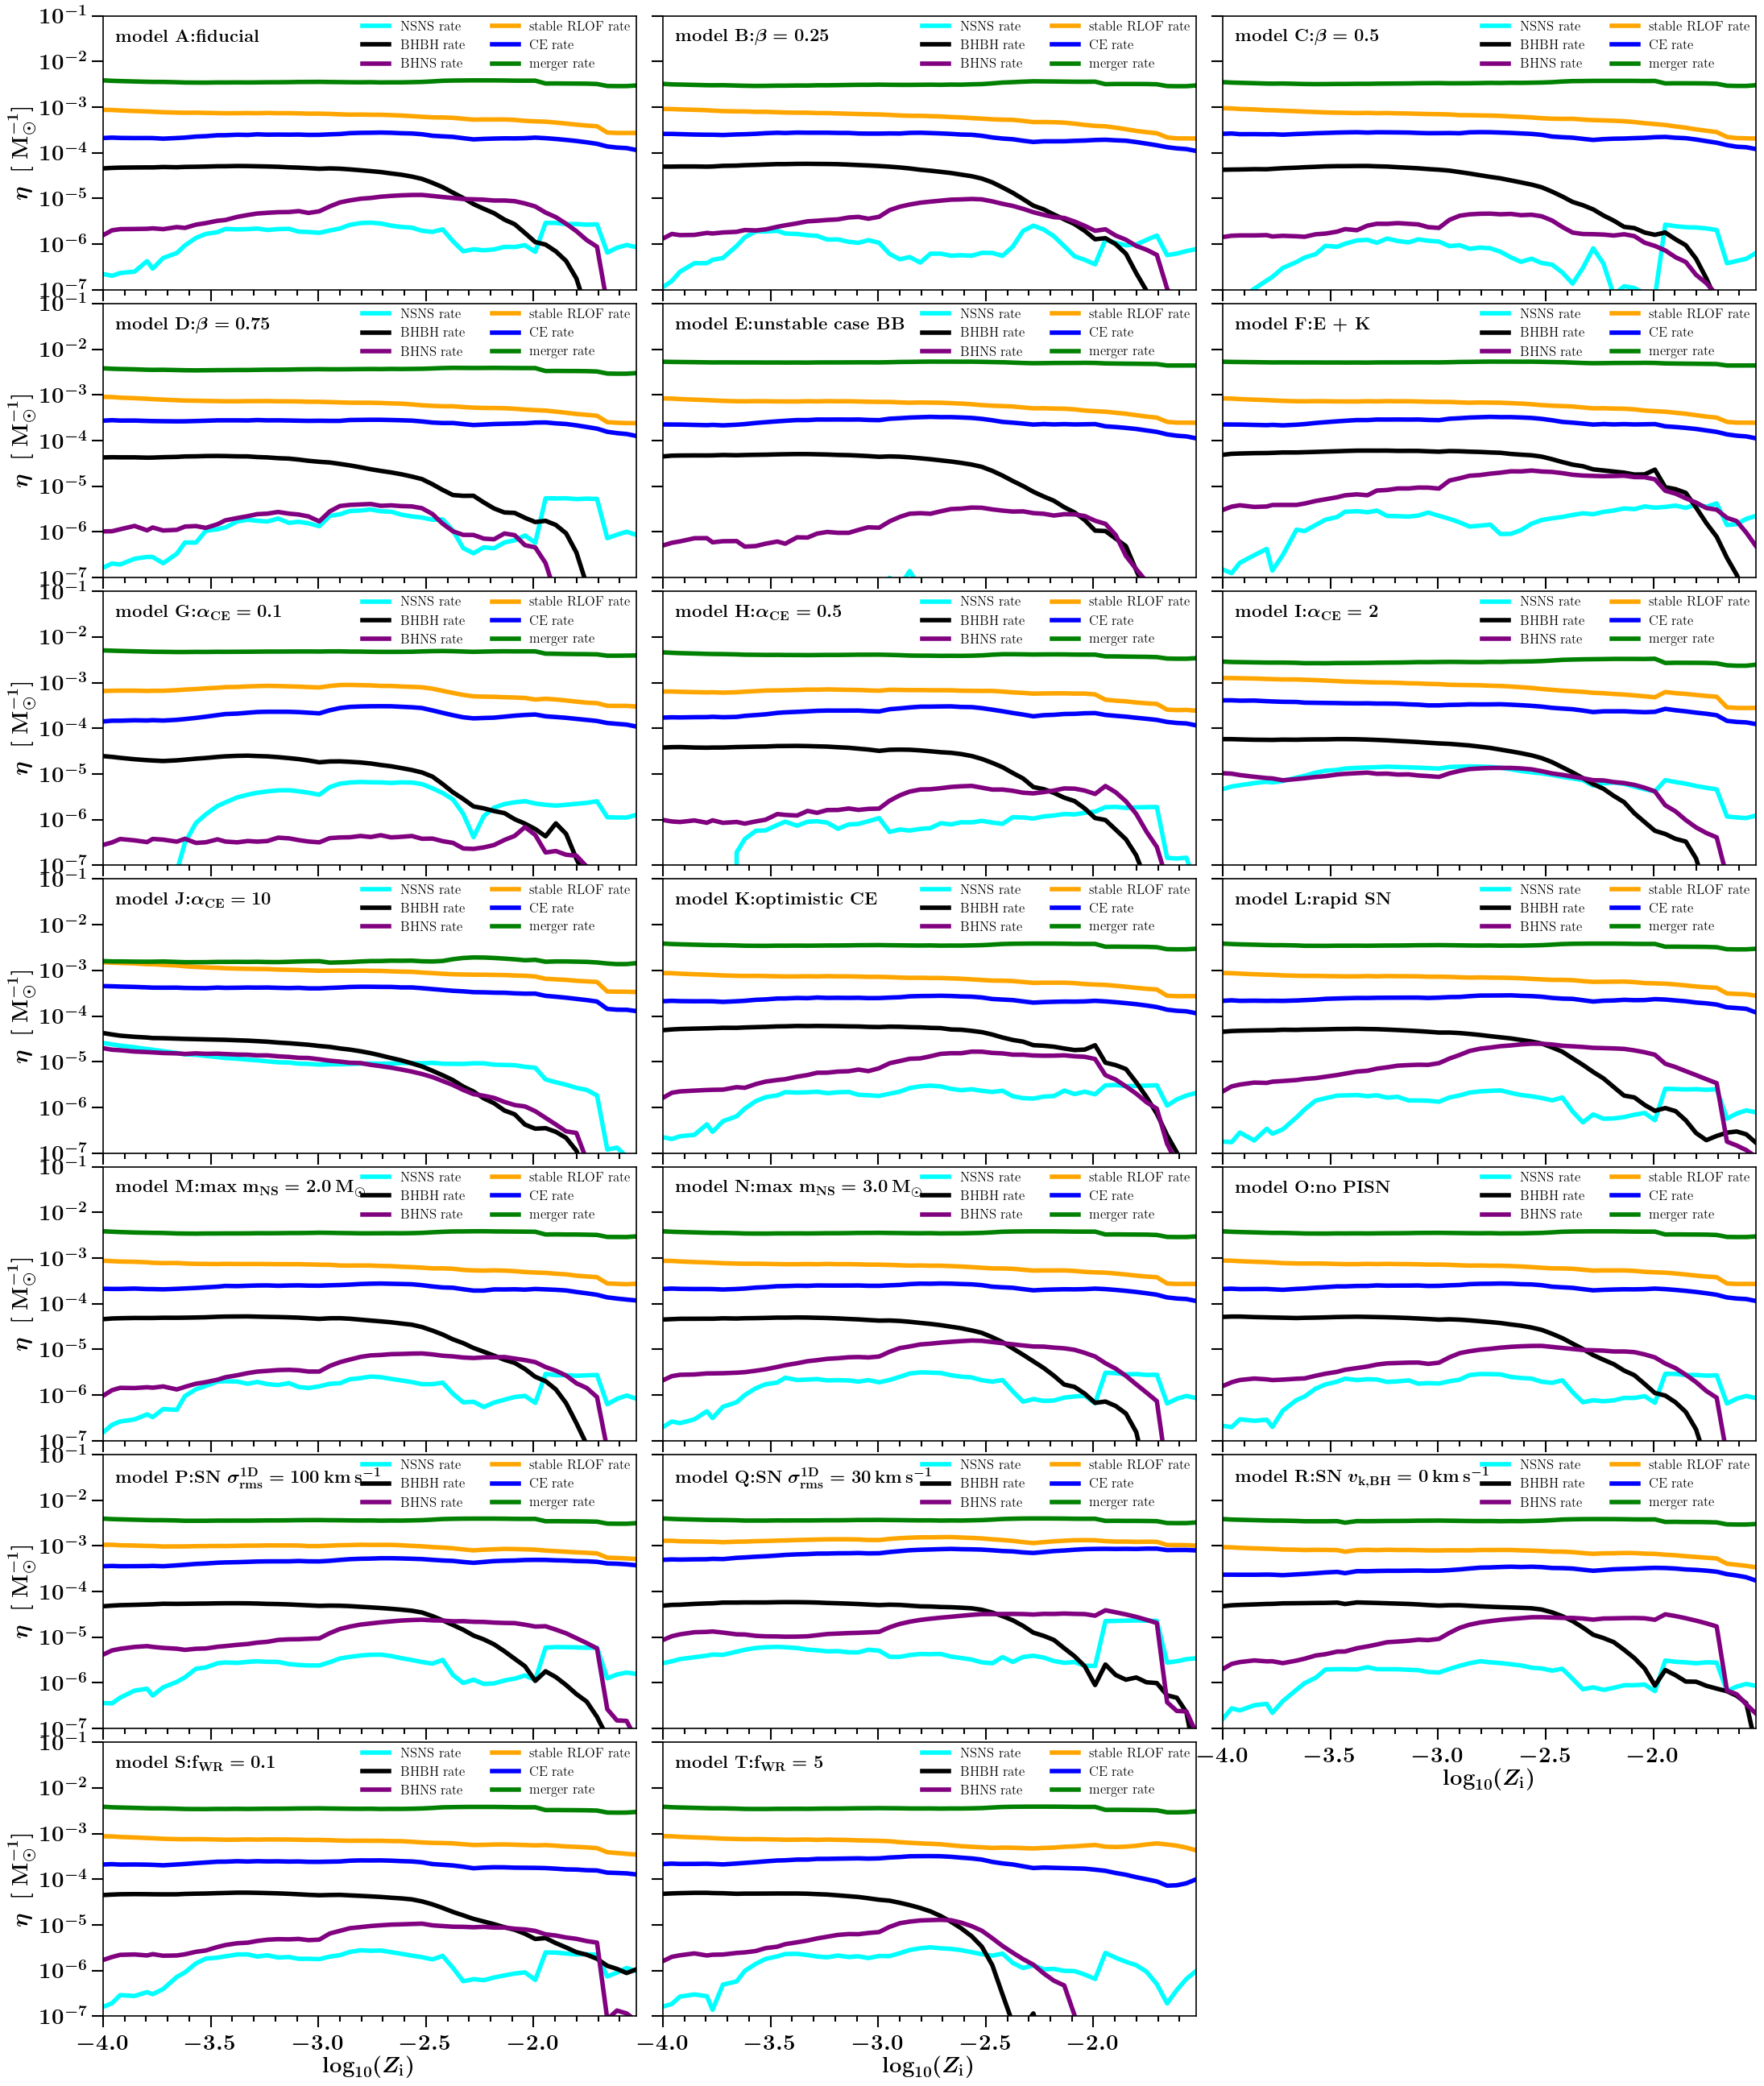

In [230]:
csvPath ='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/'    
plotGridFormationRatePerMetallicity(DCOtype = 'BNS', Ylim = [1E-7, 1E-1], csvPath=csvPath, plot_stacked=False, plot_fraction=False)



doing DCO type   BNS


/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_78759/2678088710.py:104: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_78759/2678088710.py:113: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig('./FormationRatePerZ_'+ DCOname +'_' + stack_str + fract_str + 'withMT.png', dpi=600, transparent=True)
/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_78759/2678088710.py:114: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig('./FormationRatePerZ_'+ DCOname +'_' + stack_str + fract_str + 'withMT.pdf')
/Users/floorbroekgaarden/miniforge3/envs/ipykernel_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


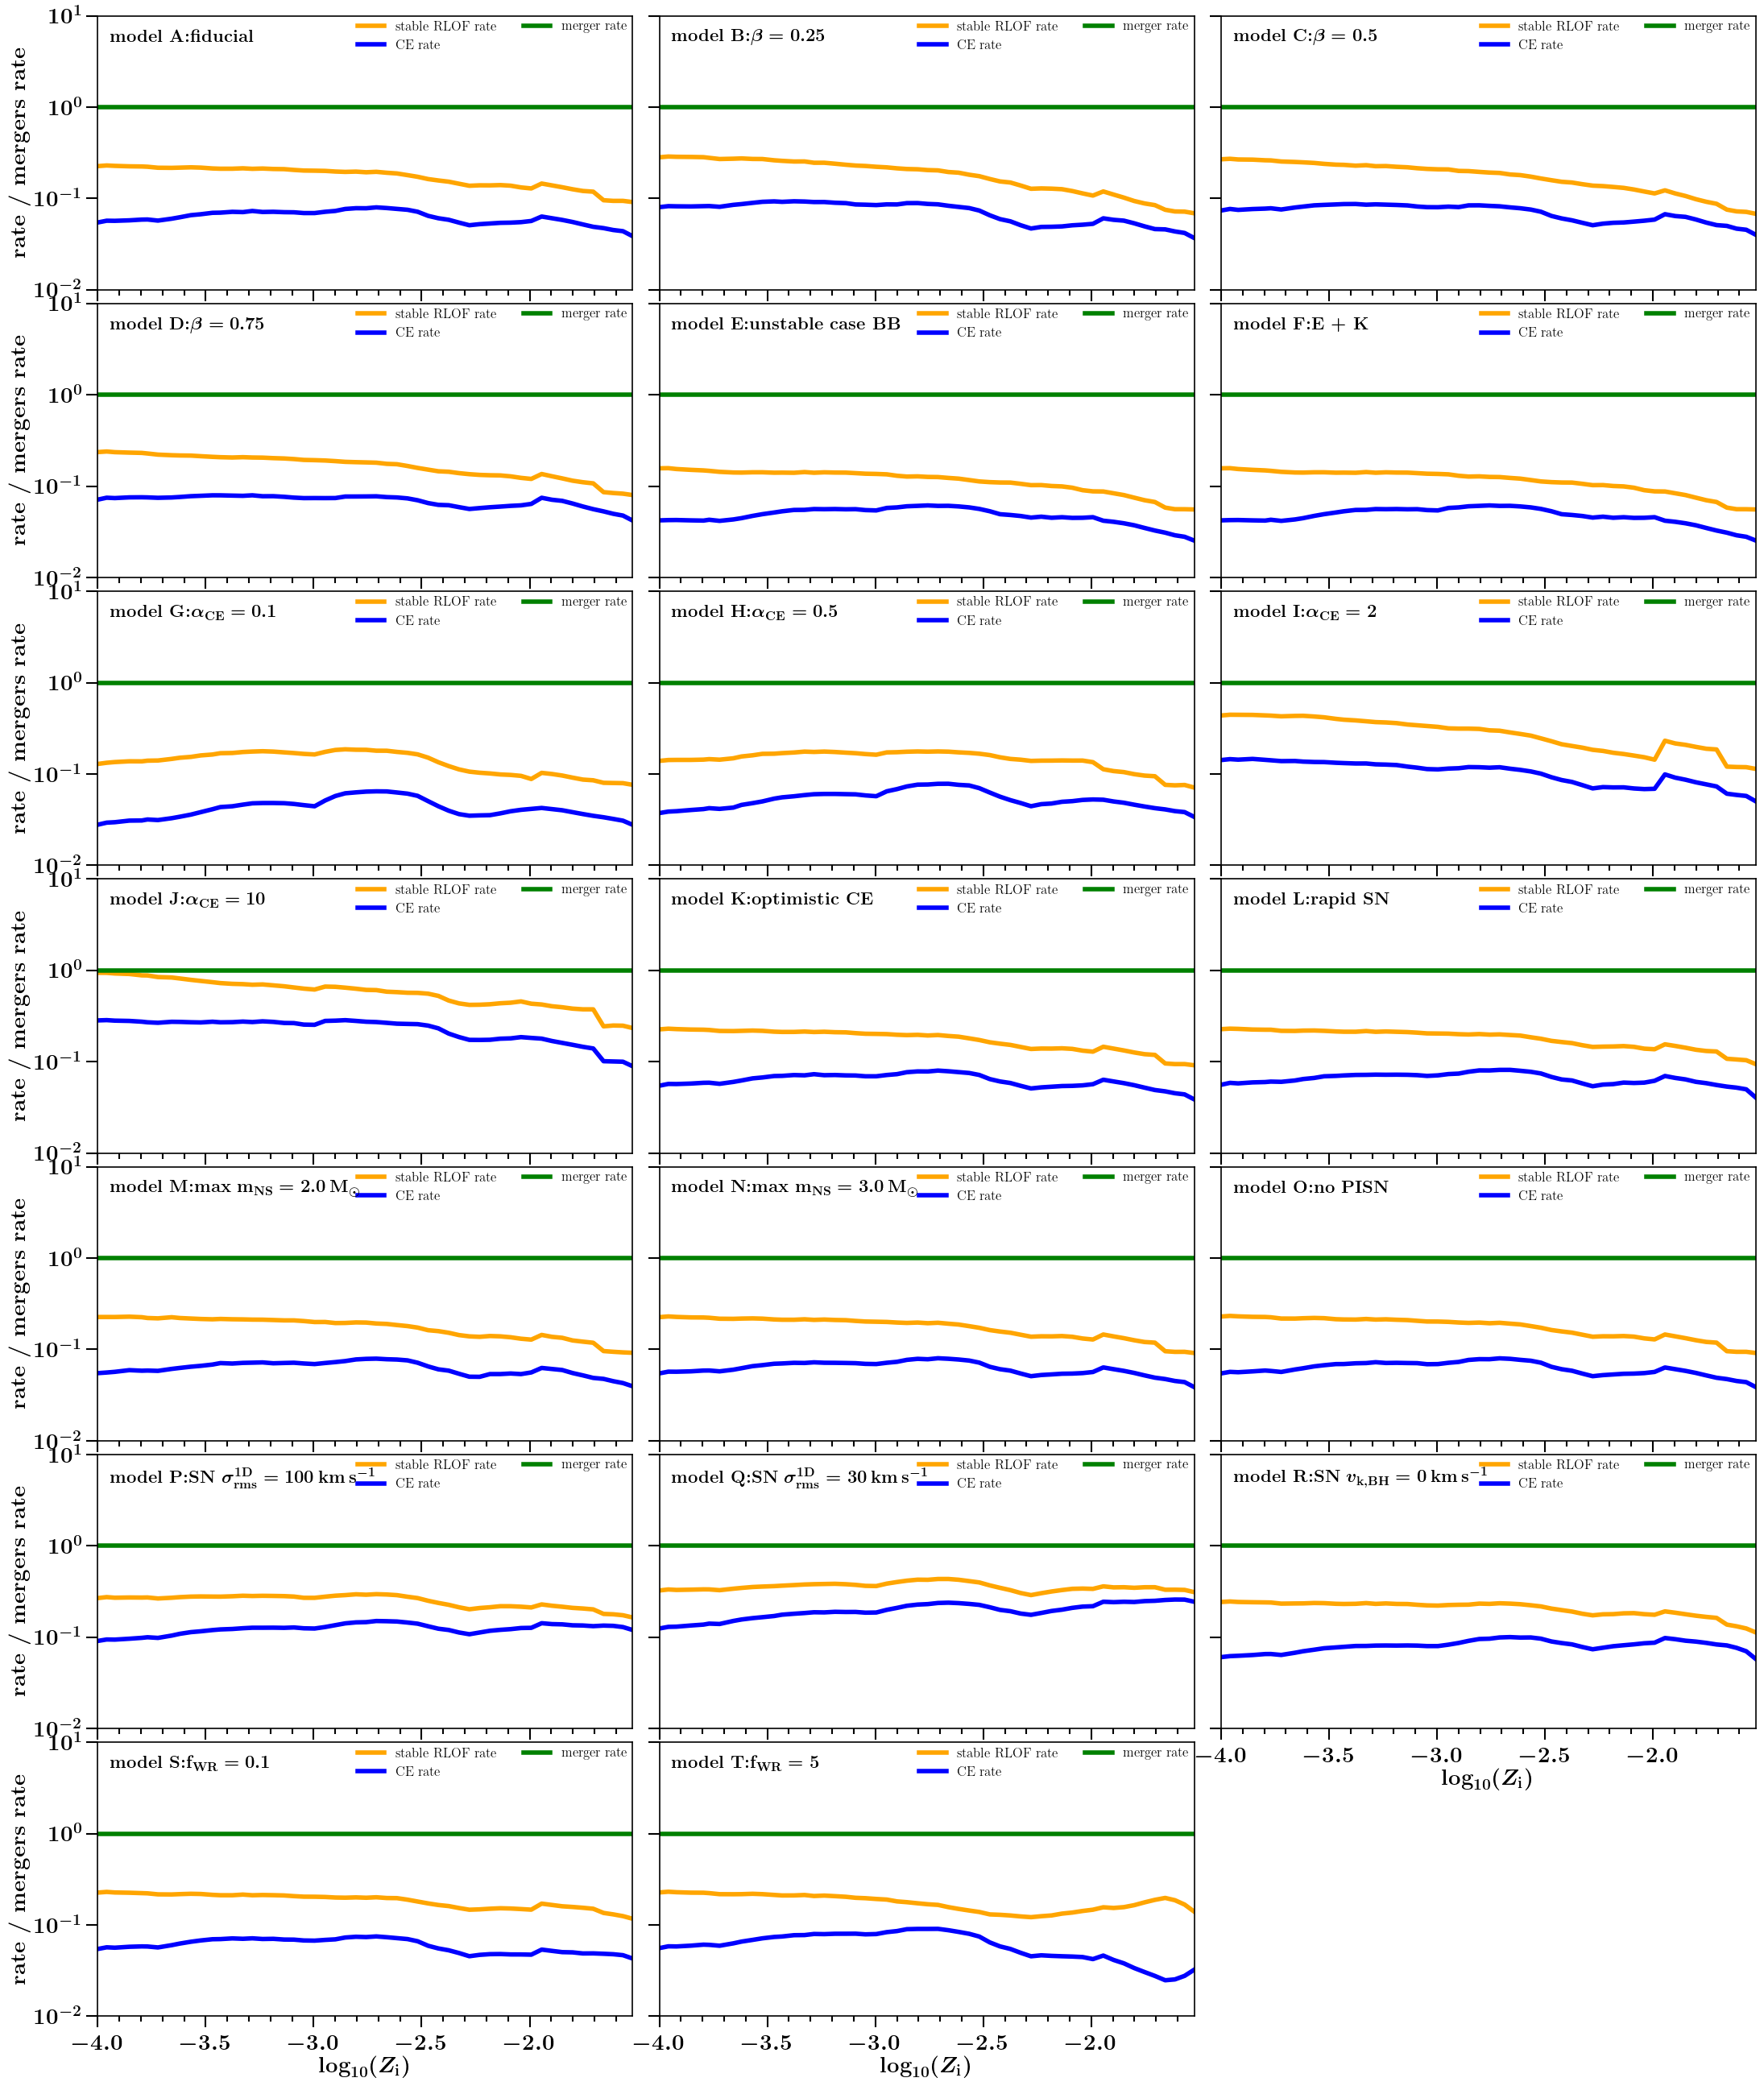

In [224]:
csvPath ='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/'    
plotGridFormationRatePerMetallicity(DCOtype = 'BNS', Ylim = [1E-2, 1E1], csvPath=csvPath, plot_stacked=False, plot_fraction=True)

